In [10]:
import sys

%load_ext autoreload
%autoreload 2

sys.path.append("..")

from src.data.process_data import *
from src.features.generate_features import *


import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-

In [16]:
pd.options.display.max_columns=100

In [26]:
connection = sqlite3.connect('../data/nba.db')

df = process_data_main(connection, 2000, 2020)

connection.close()

df

..\src\data\process_data.py:145: RuntimeWarning: All-NaN axis encountered
  abs(row)) if np.nanmax(row) > 0 else -np.nanmax(abs(row)), axis=1)
..\src\data\process_data.py:151: RuntimeWarning: All-NaN axis encountered
  abs(row)) if np.nanmax(row) > 0 else -np.nanmax(abs(row)), axis=1)
..\src\data\process_data.py:212: RuntimeWarning: All-NaN axis encountered
  lambda row: -np.nanmax(abs(row)) if np.nanmax(row) < 0 else np.nanmax(abs(row)), axis=1)
..\src\data\process_data.py:217: RuntimeWarning: All-NaN axis encountered
  lambda row: -np.nanmax(abs(row)) if np.nanmax(row) < 0 else np.nanmax(abs(row)), axis=1)


,SEASON_team,TEAM_ID_team,TEAM_ABBREVIATION_team,TEAM_NAME_team,GAME_ID,GAME_DATE_team,MATCHUP_team,HOME_GAME_team,TEAM_SCORE_team,POINT_DIFF_team,WL_team,RECORD_team,FG2M_team,FG2A_team,FG3M_team,FG3A_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,STL_team,BLK_team,TOV_team,PF_team,PTS_team,PLUS_MINUS_team,E_OFF_RATING_team,E_DEF_RATING_team,E_NET_RATING_team,POSS_team,PIE_team,PTS_2PT_MR_team,PTS_FB_team,PTS_OFF_TOV_team,PTS_PAINT_team,AST_2PM_team,AST_3PM_team,UAST_2PM_team,UAST_3PM_team,ML_team,SPREAD_team,ATS_DIFF_team,TEAM_COVERED_team,RECORD_opp,FG2M_opp,FG2A_opp,FG3M_opp,FG3A_opp,FTM_opp,FTA_opp,OREB_opp,DREB_opp,REB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,PTS_opp,PLUS_MINUS_opp,E_OFF_RATING_opp,E_DEF_RATING_opp,E_NET_RATING_opp,POSS_opp,PIE_opp,PTS_2PT_MR_opp,PTS_FB_opp,PTS_OFF_TOV_opp,PTS_PAINT_opp,AST_2PM_opp,AST_3PM_opp,UAST_2PM_opp,UAST_3PM_opp,ATS_DIFF_opp,TEAM_COVERED_opp
1,2006-07,1610612756,PHX,Phoenix Suns,0020600002,2006-10-31,PHX @ LAL,0,106,-8,0,0,27,47,13,30,13,17,4,25,29,29,7,5,21,25,106,-8,104.5,111.2,-6.7,103.0,0.440,20,20,16,34,17,11,9,1,1.263158,-8.5,-16.5,0,1,40,71,6,12,16,24,12,31,43,30,11,1,21,19,114,8,111.2,104.5,6.7,104.0,0.560,14,24,31,66,25,4,15,1,16.5,1
2,2006-07,1610612747,LAL,Los Angeles Lakers,0020600002,2006-10-31,LAL vs. PHX,1,114,8,1,1,40,71,6,12,16,24,12,31,43,30,11,1,21,19,114,8,111.2,104.5,6.7,104.0,0.560,14,24,31,66,25,4,15,1,3.900000,8.5,16.5,1,0,27,47,13,30,13,17,4,25,29,29,7,5,21,25,106,-8,104.5,111.2,-6.7,103.0,0.440,20,20,16,34,17,11,9,1,-16.5,0
5,2006-07,1610612748,MIA,Miami Heat,0020600001,2006-10-31,MIA vs. CHI,1,66,-42,0,0,22,48,3,17,13,22,4,25,29,13,6,3,23,24,66,-42,70.5,112.4,-42.0,93.0,0.150,18,6,14,26,11,0,10,2,1.454545,-4.5,-46.5,0,1,32,66,7,13,23,32,13,36,49,22,10,5,16,21,108,42,112.4,70.5,42.0,92.0,0.850,27,20,31,35,16,4,15,2,46.5,1
6,2006-07,1610612741,CHI,Chicago Bulls,0020600001,2006-10-31,CHI @ MIA,0,108,42,1,1,32,66,7,13,23,32,13,36,49,22,10,5,16,21,108,42,112.4,70.5,42.0,92.0,0.850,27,20,31,35,16,4,15,2,2.800000,4.5,46.5,1,0,22,48,3,17,13,22,4,25,29,13,6,3,23,24,66,-42,70.5,112.4,-42.0,93.0,0.150,18,6,14,26,11,0,10,2,-46.5,0
9,2006-07,1610612760,OKC,Seattle SuperSonics,0020600013,2006-11-01,OKC vs. POR,1,106,-4,0,0,35,71,6,19,18,20,15,19,34,23,9,4,13,25,106,-4,109.5,116.5,-7.0,94.0,0.463,13,23,23,55,17,6,17,0,NaN,NaN,NaN,0,1,38,63,2,10,28,35,10,30,40,13,6,6,16,21,110,4,116.5,109.5,7.0,94.0,0.537,22,8,17,54,10,2,27,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76538,2020-21,1610612749,MIL,Milwaukee Bucks,0042000404,2021-07-14,MIL vs. PHX,1,109,6,1,1,32,68,7,29,24,29,17,31,48,22,11,3,5,18,109,6,111.5,104.7,6.8,97.0,0.536,16,15,23,47,16,5,16,1,1.487805,-5.0,1.0,1,0,33,55,7,23,16,19,5,35,40,18,3,9,17,24,103,-6,104.7,111.5,-6.8,97.0,0.464,25,0,5,39,10,7,22,0,-1.0,0
76541,2020-21,1610612756,PHX,Phoenix Suns,0042000405,2021-07-17,PHX vs. MIL,1,119,-4,0,0,35,68,13,19,10,11,8,27,35,23,9,5,9,20,119,-4,128.2,128.8,-0.6,92.0,0.503,17,12,17,52,14,8,21,4,1.540541,-4.5,-8.5,0,1,36,59,14,28,9,17,11,26,37,26,7,1,12,17,123,4,128.8,128.2,0.6,91.0,0.497,25,21,15,46,14,11,21,2,8.5,1
76542,2020-21,1610612749,MIL,Milwaukee Bucks,0042000405,2021-07-17,MIL @ PHX,0,123,4,1,1,36,59,14,28,9,17,11,26,37,26,7,1,12,17,123,4,128.8,128.2,0.6,91.0,0.497,25,21,15,46,14,11,21,2,2.600000,4.5,8.5,1,0,35,68,13,19,10,11,8,27,35,23,9,5,9,20,119,-4,128.2,128.8,-0.6,92.0,0.503,17,12,17,52,14,8,21,4,-8.5,0
76545,2020-21,1610612749,MIL,Milwaukee Bucks,0042000406,2021-07-20,MIL vs. PHX,1,105,7,1,1,31,55,6,27,25,29,11,42,53,20,10,6,19,17,105,7,102.2,94.8,7.4,103.0,0.583,11,11,9,49,16,3,14,3,1.526316,-4.5,2.5,1,0,32,61,6,25,16,19,6,31,37,14,11,4,15,21,98,-7,94.8,102.2,-7.4,102.0,0.417,19,10,15,44,10,4,22,1,-2.5,0


In [27]:
df = generate_features_main(df)

df

Progress: 100%|████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.19it/s]
progress:: 38274it [01:05, 582.90it/s]


,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,HOME_GAME,SCORE_team,POINT_DIFF_team,WL_team,ML_team,SPREAD_team,TEAM_COVERED_team,RECORD_team_diff,FG2M_team_diff,FG2A_team_diff,FG3M_team_diff,FG3A_team_diff,FTM_team_diff,FTA_team_diff,OREB_team_diff,DREB_team_diff,REB_team_diff,AST_team_diff,STL_team_diff,BLK_team_diff,TOV_team_diff,PF_team_diff,PTS_team_diff,PLUS_MINUS_team_diff,E_OFF_RATING_team_diff,E_DEF_RATING_team_diff,E_NET_RATING_team_diff,POSS_team_diff,PIE_team_diff,PTS_2PT_MR_team_diff,PTS_FB_team_diff,PTS_OFF_TOV_team_diff,PTS_PAINT_team_diff,AST_2PM_team_diff,AST_3PM_team_diff,UAST_2PM_team_diff,UAST_3PM_team_diff,ATS_DIFF_team_diff,RECORD_opp_diff,FG2M_opp_diff,FG2A_opp_diff,FG3M_opp_diff,FG3A_opp_diff,...,DREB_opp_diff,REB_opp_diff,AST_opp_diff,STL_opp_diff,BLK_opp_diff,TOV_opp_diff,PF_opp_diff,PTS_opp_diff,PLUS_MINUS_opp_diff,E_OFF_RATING_opp_diff,E_DEF_RATING_opp_diff,E_NET_RATING_opp_diff,POSS_opp_diff,PIE_opp_diff,PTS_2PT_MR_opp_diff,PTS_FB_opp_diff,PTS_OFF_TOV_opp_diff,PTS_PAINT_opp_diff,AST_2PM_opp_diff,AST_3PM_opp_diff,UAST_2PM_opp_diff,UAST_3PM_opp_diff,ATS_DIFF_opp_diff,TEAM_COVERED_opp_diff,WL_PCT_diff,ATS_PCT_diff,AVG_SPREAD_diff,AVG_ML_diff,AVG_ATS_DIFF_diff,OREB_PCT_team_diff,OREB_PCT_opp_diff,DREB_PCT_team_diff,DREB_PCT_opp_diff,REB_PCT_team_diff,REB_PCT_opp_diff,TS_PCT_team_diff,TS_PCT_opp_diff,EFG_PCT_team_diff,EFG_PCT_opp_diff,AST_RATIO_team_diff,AST_RATIO_opp_diff,TOV_PCT_team_diff,TOV_PCT_opp_diff,REST_diff,team_elo_pred,team_rating_i,team_rating_n,opp_rating_i,opp_rating_n,elo_MOV_pred
0,2006-07,1610612741,CHI,Chicago Bulls,0020600001,2006-10-31,CHI @ MIA,0,108,42,1,2.800000,4.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1335.473990,1300.000000,1264.526010,0.00
1,2006-07,1610612748,MIA,Miami Heat,0020600001,2006-10-31,MIA vs. CHI,1,66,-42,0,1.454545,-4.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598014,1300.000000,1264.526010,1300.000000,1335.473990,0.00
2,2006-07,1610612756,PHX,Phoenix Suns,0020600002,2006-10-31,PHX @ LAL,0,106,-8,0,1.263158,-8.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1292.274009,1300.000000,1307.725991,0.00
3,2006-07,1610612747,LAL,Los Angeles Lakers,0020600002,2006-10-31,LAL vs. PHX,1,114,8,1,3.900000,8.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598014,1300.000000,1307.725991,1300.000000,1292.274009,0.00
4,2006-07,1610612737,ATL,Atlanta Hawks,0020600003,2006-11-01,ATL @ PHI,0,75,-13,0,3.000000,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1289.573561,1300.000000,1310.426439,0.00
...,...,..

In [28]:
df

,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,HOME_GAME,SCORE_team,POINT_DIFF_team,WL_team,ML_team,SPREAD_team,TEAM_COVERED_team,RECORD_team_diff,FG2M_team_diff,FG2A_team_diff,FG3M_team_diff,FG3A_team_diff,FTM_team_diff,FTA_team_diff,OREB_team_diff,DREB_team_diff,REB_team_diff,AST_team_diff,STL_team_diff,BLK_team_diff,TOV_team_diff,PF_team_diff,PTS_team_diff,PLUS_MINUS_team_diff,E_OFF_RATING_team_diff,E_DEF_RATING_team_diff,E_NET_RATING_team_diff,POSS_team_diff,PIE_team_diff,PTS_2PT_MR_team_diff,PTS_FB_team_diff,PTS_OFF_TOV_team_diff,PTS_PAINT_team_diff,AST_2PM_team_diff,AST_3PM_team_diff,UAST_2PM_team_diff,UAST_3PM_team_diff,ATS_DIFF_team_diff,RECORD_opp_diff,FG2M_opp_diff,FG2A_opp_diff,FG3M_opp_diff,FG3A_opp_diff,...,DREB_opp_diff,REB_opp_diff,AST_opp_diff,STL_opp_diff,BLK_opp_diff,TOV_opp_diff,PF_opp_diff,PTS_opp_diff,PLUS_MINUS_opp_diff,E_OFF_RATING_opp_diff,E_DEF_RATING_opp_diff,E_NET_RATING_opp_diff,POSS_opp_diff,PIE_opp_diff,PTS_2PT_MR_opp_diff,PTS_FB_opp_diff,PTS_OFF_TOV_opp_diff,PTS_PAINT_opp_diff,AST_2PM_opp_diff,AST_3PM_opp_diff,UAST_2PM_opp_diff,UAST_3PM_opp_diff,ATS_DIFF_opp_diff,TEAM_COVERED_opp_diff,WL_PCT_diff,ATS_PCT_diff,AVG_SPREAD_diff,AVG_ML_diff,AVG_ATS_DIFF_diff,OREB_PCT_team_diff,OREB_PCT_opp_diff,DREB_PCT_team_diff,DREB_PCT_opp_diff,REB_PCT_team_diff,REB_PCT_opp_diff,TS_PCT_team_diff,TS_PCT_opp_diff,EFG_PCT_team_diff,EFG_PCT_opp_diff,AST_RATIO_team_diff,AST_RATIO_opp_diff,TOV_PCT_team_diff,TOV_PCT_opp_diff,REST_diff,team_elo_pred,team_rating_i,team_rating_n,opp_rating_i,opp_rating_n,elo_MOV_pred
0,2006-07,1610612741,CHI,Chicago Bulls,0020600001,2006-10-31,CHI @ MIA,0,108,42,1,2.800000,4.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1335.473990,1300.000000,1264.526010,0.00
1,2006-07,1610612748,MIA,Miami Heat,0020600001,2006-10-31,MIA vs. CHI,1,66,-42,0,1.454545,-4.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598014,1300.000000,1264.526010,1300.000000,1335.473990,0.00
2,2006-07,1610612756,PHX,Phoenix Suns,0020600002,2006-10-31,PHX @ LAL,0,106,-8,0,1.263158,-8.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1292.274009,1300.000000,1307.725991,0.00
3,2006-07,1610612747,LAL,Los Angeles Lakers,0020600002,2006-10-31,LAL vs. PHX,1,114,8,1,3.900000,8.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598014,1300.000000,1307.725991,1300.000000,1292.274009,0.00
4,2006-07,1610612737,ATL,Atlanta Hawks,0020600003,2006-11-01,ATL @ PHI,0,75,-13,0,3.000000,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401986,1300.000000,1289.573561,1300.000000,1310.426439,0.00
...,...,..

In [17]:
df = df.dropna()
df

,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,HOME_GAME,SCORE_team,POINT_DIFF_team,WL_team,ML_team,SPREAD_team,TEAM_COVERED_team,RECORD_team_diff,FG2M_team_diff,FG2A_team_diff,FG3M_team_diff,FG3A_team_diff,FTM_team_diff,FTA_team_diff,OREB_team_diff,DREB_team_diff,REB_team_diff,AST_team_diff,STL_team_diff,BLK_team_diff,TOV_team_diff,PF_team_diff,PTS_team_diff,PLUS_MINUS_team_diff,E_OFF_RATING_team_diff,E_DEF_RATING_team_diff,E_NET_RATING_team_diff,POSS_team_diff,PIE_team_diff,PTS_2PT_MR_team_diff,PTS_FB_team_diff,PTS_OFF_TOV_team_diff,PTS_PAINT_team_diff,AST_2PM_team_diff,AST_3PM_team_diff,UAST_2PM_team_diff,UAST_3PM_team_diff,ATS_DIFF_team_diff,RECORD_opp_diff,FG2M_opp_diff,FG2A_opp_diff,FG3M_opp_diff,FG3A_opp_diff,...,DREB_opp_diff,REB_opp_diff,AST_opp_diff,STL_opp_diff,BLK_opp_diff,TOV_opp_diff,PF_opp_diff,PTS_opp_diff,PLUS_MINUS_opp_diff,E_OFF_RATING_opp_diff,E_DEF_RATING_opp_diff,E_NET_RATING_opp_diff,POSS_opp_diff,PIE_opp_diff,PTS_2PT_MR_opp_diff,PTS_FB_opp_diff,PTS_OFF_TOV_opp_diff,PTS_PAINT_opp_diff,AST_2PM_opp_diff,AST_3PM_opp_diff,UAST_2PM_opp_diff,UAST_3PM_opp_diff,ATS_DIFF_opp_diff,TEAM_COVERED_opp_diff,WL_PCT_diff,ATS_PCT_diff,AVG_SPREAD_diff,AVG_ML_diff,AVG_ATS_DIFF_diff,OREB_PCT_team_diff,OREB_PCT_opp_diff,DREB_PCT_team_diff,DREB_PCT_opp_diff,REB_PCT_team_diff,REB_PCT_opp_diff,TS_PCT_team_diff,TS_PCT_opp_diff,EFG_PCT_team_diff,EFG_PCT_opp_diff,AST_RATIO_team_diff,AST_RATIO_opp_diff,TOV_PCT_team_diff,TOV_PCT_opp_diff,REST_diff,team_elo_pred,team_rating_i,team_rating_n,opp_rating_i,opp_rating_n,elo_MOV_pred
15450,2006-07,1610612758,SAC,Sacramento Kings,0020600026,2006-11-03,SAC @ CHI,0,89,1,1,3.000000,6.0,1,-0.473684,-3.473684,10.105263,-3.473684,-1.684211,-0.263158,-2.789474,10.052632,3.526316,13.578947,-8.473684,1.578947,-0.368421,2.526316,-5.263158,-17.631579,-21.000000,-17.952632,1.868421,-20.021053,-0.578947,-0.186789,-8.894737,-11.210526,-4.421053,3.947368,-6.473684,-1.000000,3.000000,-1.473684,-17.078947,0.473684,5.315789,13.421053,-0.578947,-3.263158,...,4.368421,5.315789,1.789474,0.473684,1.894737,-2.000000,2.526316,3.368421,21.000000,1.868421,-17.952632,20.021053,-1.052632,0.186789,13.631579,-7.789474,0.789474,-3.473684,1.368421,0.894737,3.947368,-0.473684,17.078947,0.473684,-0.500000,-0.500000,3.750000,0.100000,-18.750000,0.105546,0.005911,-0.005911,-0.105546,0.039250,-0.039250,-0.141239,-0.040183,-0.145935,-0.012494,-8.968637,2.131283,0.963801,-2.567630,0.0,0.391082,1521.155095,1526.400234,1529.071843,1523.826703,-0.28
15451,2006-07,1610612741,CHI,Chicago Bulls,0020600026,2006-11-03,CHI vs. SAC,1,88,-1,0,1.416667,-6.0,0,0.473684,3.473684,-10.105263,3.473684,1.684211,0.263158,2.789474,-10.052632,-3.526316,-13.578947,8.473684,-1.578947,0.368421,-2.526316,5.263158,17.631579,21.000000,17.952632,-1.868421,20.021053,0.578947,0.186789,8.894737,11.210526,4.421053,-3.947368,6.473684,1.000000,-3.000000,1.473684,17.078947,-0.473684,-5.315789,-13.421053,0.578947,3.263158,...,-4.368421,-5.315789,-1.789474,-0.473684,-1.894737,2.000000,-2.526316,-3.368421,-21.000000,-1.868421,17.952632,-20.021053,1.052632,-0.186789,-13.631579,7.789474,-0.789474,3.473684,-1.368421,-0.894737,-3.947368,0.473684,-17.078947,-0.473684,0.500000,0.500000,-3.750000,-0.100000,18.750000,-0.105546,-0.005911,0.005911,0.105546,-0.039250,0.039250,0.141239,0.040183,0.145935,0.012494,8.968637,-2.131283,-0.963801,2.567630,0.0,0.608918,1529.071843,1523.826703,1521.155095,1526.400234,0.28
15466,2006-07,1610612763,MEM,Memphis Grizzlies,0020600034,2006-11-04,MEM @ DET,0,86,-9,0,3.800000,8.0,0,0.000000,-0.157895,10.368421,2.210526,4.736842,0.526316,4.157895,6.315789,-1.578947,4.736842,-5.526316,3.000000,-1.000000,0.421053,7.421053,6.842105,3.315789,-4.731579,-6.742105,2.010526,11.157895,0.012316,-12.947368,-0.684211,11.789474,13.684211,-7.736842,1.210526,8.052632,0.526316,2.684211,0.000000,-5.210526,-7.052632,2.736842,4.315789,...,3.105263,4.842105,-2.421053,-1.789474,5.947368,10.157895,12.789474,3.526316,-3.315789,-6.742105,-4.73157

In [40]:
plt.style.use('fivethirtyeight')

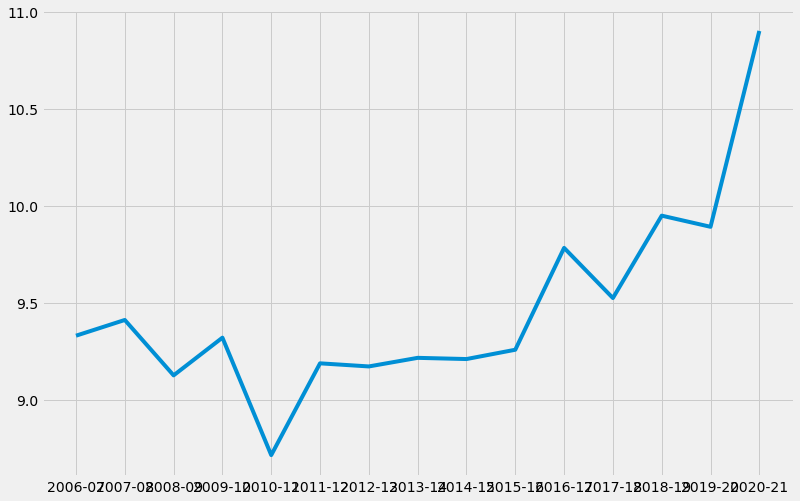

In [45]:
df['spread_actual_diff'] = df['SPREAD_team'] + df['POINT_DIFF_team']
df['abs_spread_actual_diff'] = np.abs(df['spread_actual_diff']) 

home_games = df.loc[df['HOME_GAME'] == 1]


home_game_abs_spread_diff = home_games.groupby('SEASON').abs_spread_actual_diff.mean().reset_index()

x = home_game_abs_spread_diff['SEASON']
y = home_game_abs_spread_diff['abs_spread_actual_diff']


fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, y)
ax.label()